Import / install modules:

In [5]:
# utils
import numpy as np
import matplotlib.pyplot as plt

# modelling
import pyro
import torch
import pyro.distributions as dist

# lib
import sys
sys.path.append('..')

In [6]:
# find gpu if available, and name
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"
print(device)
torch.set_default_dtype(torch.float64)

# show device info
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

cpu


Generate synthetic data:

In [7]:
NUM_POINTS = 500 # number of observation points
NOISE_LEVEL = 2  # noise level
XRANGE = [-30, 60] # range of x values

# Generate noisy data from a known function
f = lambda x: (2. * x[:, 0] * (1. + np.sin(.5 * x[:, 0])) + 5.)
X_true = np.linspace(XRANGE[0], XRANGE[1], NUM_POINTS)[..., np.newaxis]
y_true = f(X_true) + NOISE_LEVEL*np.random.normal(size=NUM_POINTS)
# Convert to torch tensors
X = torch.from_numpy(X_true)
y = torch.from_numpy(y_true)

In [ ]:
import pyrocell.gp as gp
import pyrocell.gp.kernels as kernels

num_steps = 3000

process = gp.GaussianProcess(kernels.Matern12, torch.optim.LBFGS)
priors = {
    "lengthscale": dist.Uniform(torch.tensor(1.), torch.tensor(20.)),
}

process.fit(X, y, loss_fn=pyro.infer.Trace_ELBO().differentiable_loss, num_steps=num_steps, priors=priors, verbose=True)

Using LBFGS closure
lengthscale_map: 19.999849900536812   lengthscale: 11.19712602514156


Make "prediction":

ValueError: 'x' is not 1-dimensional

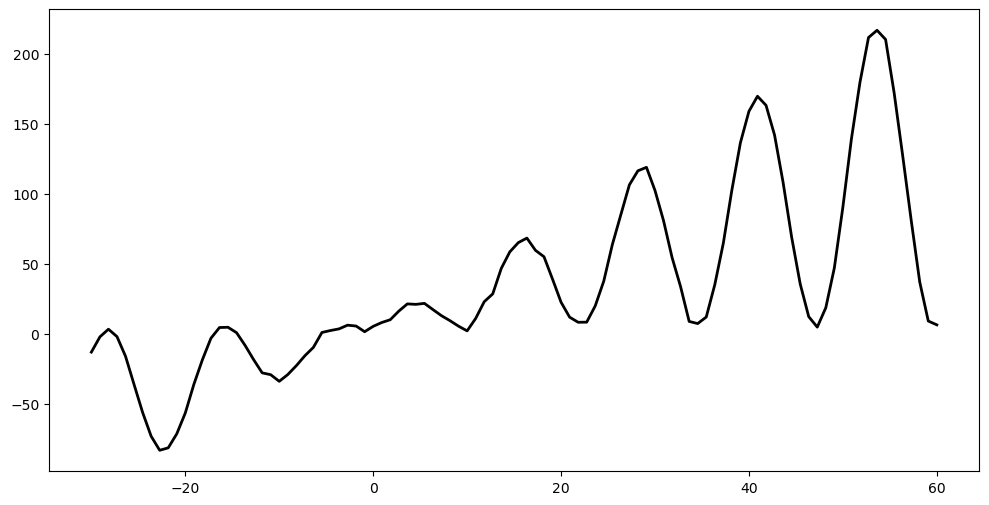

In [6]:
# make test plot
process.test_plot()